In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files 
uploaded= files.upload ()

Saving UserKnowledgeModeling.csv to UserKnowledgeModeling.csv


In [3]:
data=pd.read_csv("UserKnowledgeModeling.csv")

In [4]:
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High


In [5]:
data["UNS"].value_counts()

Low         129
Middle      122
High        102
Very Low     26
very_low     24
Name: UNS, dtype: int64

In [6]:
data["UNS"]=data["UNS"].replace("Very Low",0)
data["UNS"]=data["UNS"].replace("very_low",0)
data["UNS"]=data["UNS"].replace("Low",1)
data["UNS"]=data["UNS"].replace("Middle",2)
data["UNS"]=data["UNS"].replace("High",3)
#.....
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,0
1,0.05,0.05,0.55,0.60,0.14,1
2,0.08,0.18,0.63,0.60,0.85,3
3,0.20,0.20,0.68,0.67,0.85,3
4,0.22,0.22,0.90,0.30,0.90,3
...,...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58,3
399,0.78,0.61,0.71,0.19,0.60,2
400,0.54,0.82,0.71,0.29,0.77,3
401,0.50,0.75,0.81,0.61,0.26,2


In [7]:
data["UNS"].value_counts()

1    129
2    122
3    102
0     50
Name: UNS, dtype: int64

In [8]:
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,0
1,0.05,0.05,0.55,0.60,0.14,1
2,0.08,0.18,0.63,0.60,0.85,3
3,0.20,0.20,0.68,0.67,0.85,3
4,0.22,0.22,0.90,0.30,0.90,3


In [9]:
data.describe()

,STG,SCG,STR,LPR,PEG,UNS
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360,1.684864
std,0.212018,0.215531,0.246684,0.257545,0.266775,0.986195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000,1.000000
50%,0.300000,0.300000,0.440000,0.330000,0.400000,2.000000
75%,0.480000,0.510000,0.680000,0.650000,0.660000,3.000000
max,0.990000,0.900000,0.950000,0.990000,0.990000,3.000000


la cantidad de datos es de 403

In [10]:
print("la cantidad de datos =",len(data))

la cantidad de datos = 403


In [15]:
pd.DataFrame(np.unique(data["UNS"],return_counts=True),columns=["muy bajo","bajo","medio","alto"])

,muy bajo,bajo,medio,alto
0,0,1,2,3
1,50,129,122,102


Se determinan 4 variables 

In [16]:
data0=data[["STG","SCG","STR","LPR","PEG"]]
data0.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.10,0.50,0.26,0.05
1,0.05,0.05,0.55,0.60,0.14
2,0.08,0.18,0.63,0.60,0.85
3,0.20,0.20,0.68,0.67,0.85
4,0.22,0.22,0.90,0.30,0.90


# vamos aplicar  los algoritmos de clustering para el conjunto  de datos  data0

Aplicando K-MEANS....

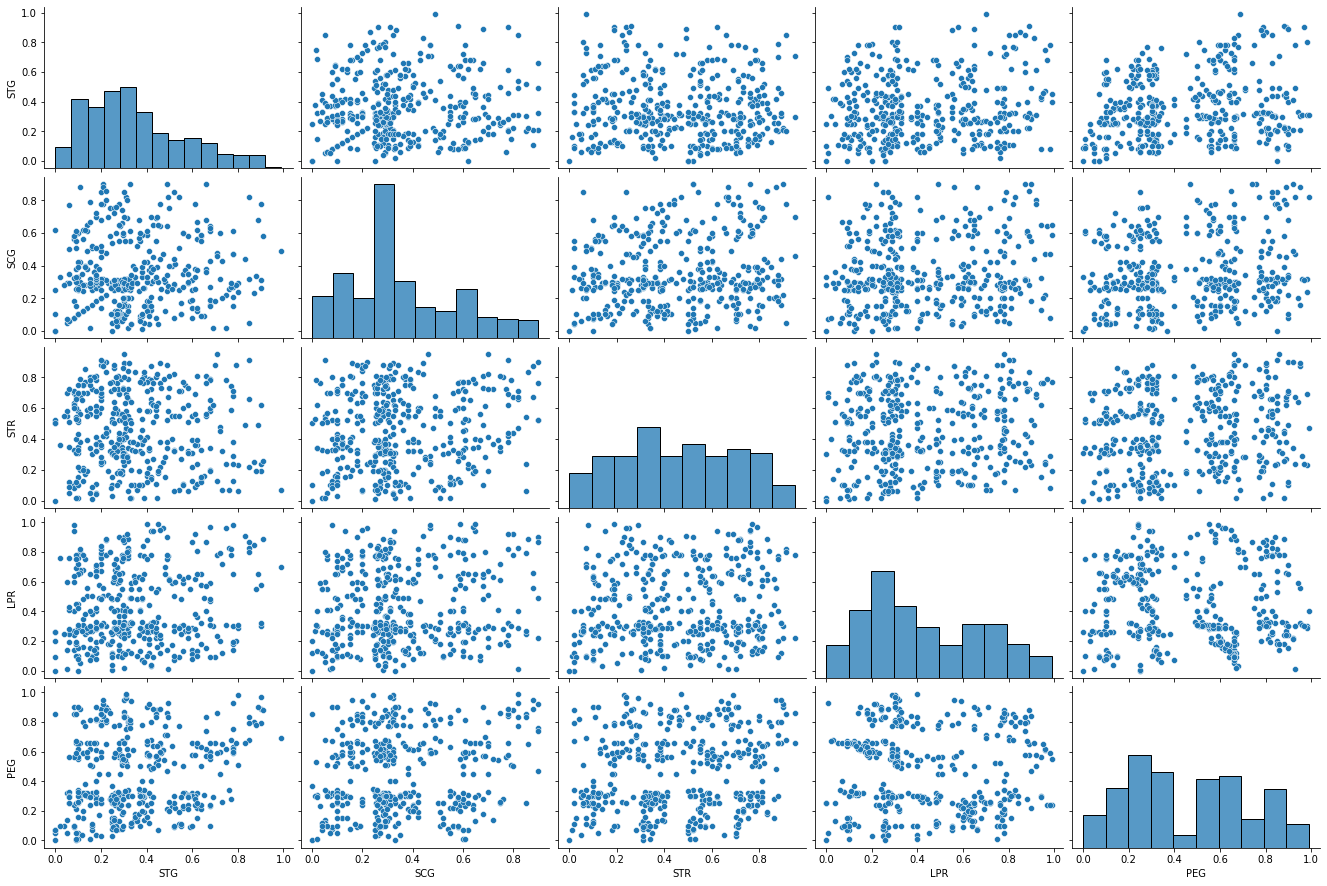

In [18]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(data0, aspect=1.5)
plt.show()

Se toman las variables LPR y PEG de esta forma se estable un relación entre cada 2 variables  a partir de un gráfico de dispersión  dando la siguiente imagen.

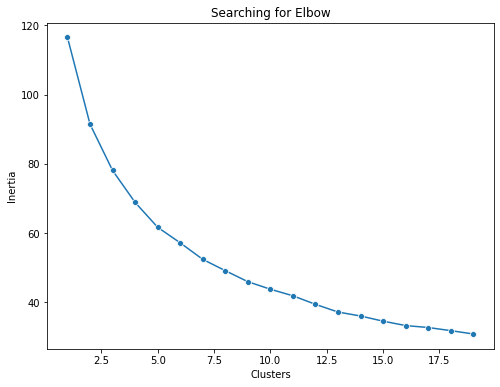

In [24]:
from sklearn.cluster import KMeans

clusters = []
for i in range(1, 20):
    km = KMeans(n_clusters=i).fit(data0)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 20)), y=clusters, ax=ax, marker="o")
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

A partir del método del codo, se buscó el punto de inflexión entre si hay cambios de inercia mediante la gráfica, es decir buscamos el punto de inflexión entre 4 y 6 por cambios en  la inercia   representada en la gráfica.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


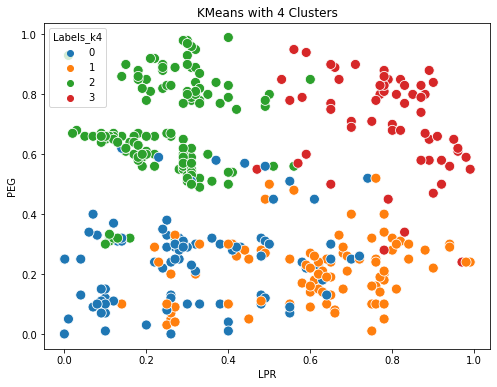

In [26]:
# 4 cluster
km4 = KMeans(n_clusters=4).fit(data0)
data['Labels_k4'] = km4.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k4'], palette=sns.color_palette('tab10', 4), s=100)
plt.title('KMeans with 4 Clusters')
plt.show()

 Se procede a realizar algoritmo de K-MEANS y a partir del análisis de 2 variables las cuales de discriminan a continuación 
	LPR (El rendimiento en el examen del usuario para los objetos relacionados con el objeto de la meta). 
	PEG (El rendimiento en el examen del usuario para los objetos de la meta).
Se obtienen 4 cluster que se mencionan a continuación 
1 Cluster 0: Bajo rendimiento en el examen del usuario para los objetos relacionados con el objeto de la meta, Alto rendimiento en el examen del usuario para los objetos de la meta
 2 Cluster 1: Alto rendimiento en el examen del usuario para los objetos relacionados con el objeto de la meta, Alto rendimiento en el examen del usuario para los objetos de la meta
 3 Cluster 2: Bajo rendimiento en el examen del usuario para los objetos relacionados con el objeto de la meta, Bajo rendimiento en el examen del usuario para los objetos de la meta 
4 Cluster 3: Alto rendimiento en el examen del usuario para los objetos relacionados con el objeto de la meta, Bajo rendimiento en el examen del usuario para los objetos de la meta


Donde se evidencia que el algoritmo K-MEANS parece la mejor opción 

APLICANDO CLUSTERING JERARQUICO 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


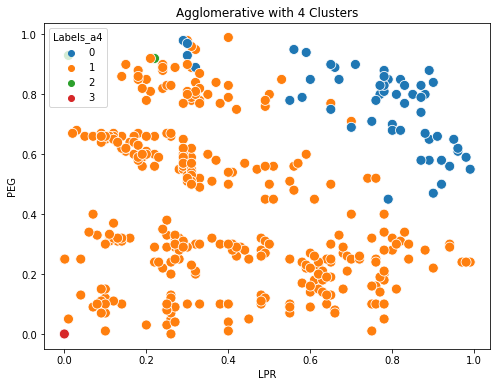

In [29]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=4, linkage='average').fit(data0)

data['Labels_a4'] = agglom.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_a4'], palette=sns.color_palette('tab10', 4), s=100)
plt.title('Agglomerative with 4 Clusters')
plt.show()

Se aplica el algoritmo de CLUSTERING JERARQUICO que en comparación con K-MEANS Agglomerative Clustering no parece funcionar 

 APLICANDO CLUSTERING DBSCAN

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


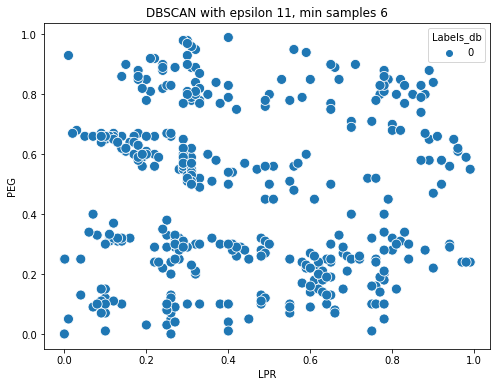

In [30]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(data0)

data['Labels_db'] = db.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_db'], palette=sns.color_palette('tab10', np.unique(db.labels_).shape[0]), s=100)
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

Se procede a la realización del algoritmo de DBSCAN que En comparación con K-MEANS DBSCAN no parece funcionar a pesar de modificaciones en las interacciones.

APLICANDO CLUSTERING Mean Shift  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


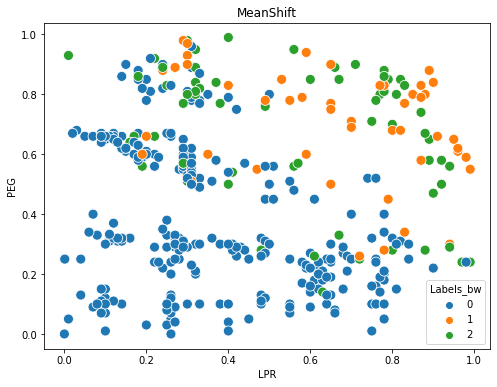

In [33]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(data0, quantile=0.08688)
ms = MeanShift(bandwidth=bandwidth).fit(data0)

data['Labels_bw'] = ms.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_bw'], palette=sns.color_palette('tab10', np.unique(ms.labels_).shape[0]), s=100)
plt.plot()
plt.title('MeanShift')
plt.show()

Se procede a la realización de Algoritmo Mean Shift  que en comparación con K-MEANS Mean Shift no parece funcionar aun con modificaciones  es las interacciones


CONCLUSIONES:
LA MEJOR OPCION FUE K-MEANS  DONDE SE EVIDENCIA  4 CLUSTERS EN RELACION CON 4 METODOS  ADEMAS SE DETERMINO DOS INDICADORES  EL PRMER CON UNA PRECISION DEL 94%  Y UN PORCENTAJE DE ACERCAMIENTO  DEL 93.

